In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [5]:
df = pd.read_csv('churn.csv') # adjust filename
print(df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [6]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])


le_geo = LabelEncoder()
df['Geography'] = le_geo.fit_transform(df['Geography'])


# Drop identifiers
X = df.drop(['CustomerId','Surname','Exited'], axis=1)


# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

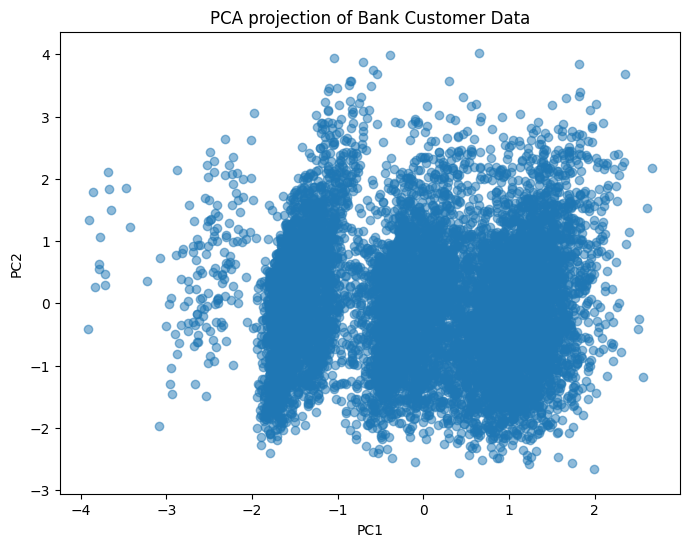

In [7]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.5)
plt.title('PCA projection of Bank Customer Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

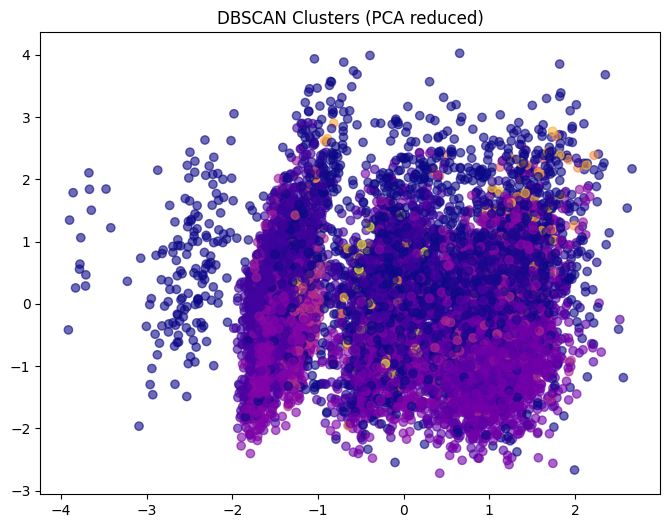

In [8]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)


# Add labels
df['Cluster'] = labels


# Plot PCA clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='plasma', alpha=0.6)
plt.title('DBSCAN Clusters (PCA reduced)')
plt.show()

In [10]:
if len(set(labels)) > 1 and -1 not in set(labels):
    score = silhouette_score(X_scaled, labels)
    print("Silhouette Score:", score)
else:
    print("Silhouette Score not defined (only one cluster or noise only).")


Silhouette Score not defined (only one cluster or noise only).


In [11]:
cluster_summary = df.groupby('Cluster').agg({
'Age':'mean',
'Balance':'mean',
'CreditScore':'mean',
'EstimatedSalary':'mean',
'Exited':'mean'
}).round(2)
print(cluster_summary)

           Age    Balance  CreditScore  EstimatedSalary  Exited
Cluster                                                        
-1       45.51   82785.97       651.23        100330.28    0.36
 0       37.58  101474.92       652.32         99665.22    0.21
 1       37.87  104462.33       651.49         96508.63    0.13
 2       37.50    3573.70       646.34         94063.67    0.02
 3       35.67   48776.84       659.81         93891.96    0.03
 4       37.32   53906.57       654.03         97732.41    0.08
 5       36.65   47547.56       657.16        100053.41    0.02
 6       35.80   45798.12       646.52        101806.77    0.11
 7       38.96   95973.37       648.14        102717.63    0.42
 8       35.22    6134.55       645.39         97379.51    0.02
 9       34.92  125091.87       612.86        116531.43    0.08
 10      36.99  119867.80       643.10         99708.19    0.23
 11      37.87  101082.63       645.14         99551.54    0.30
 12      38.38  112240.26       661.98  